In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [10]:
mu1, mu2=-5. , 5.
sigma1, sigma2= 1., 3. 
N=1000

p=0.5

dist1=tf.distributions.Normal(loc=mu1, scale=sigma1)
dist2=tf.distributions.Normal(loc=mu2, scale=sigma2)

x=tf.constant(np.linspace(-25.0,25.0,20000), dtype=tf.float32)
mix_pdf=p*dist1.prob(x)+(1-p)*dist2.prob(x)


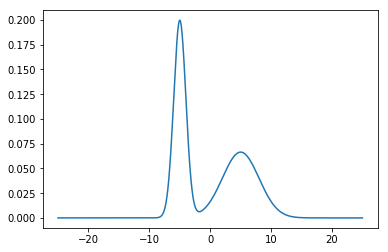

In [3]:
# plot pdf
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

plt.plot(sess.run(x), sess.run(mix_pdf))


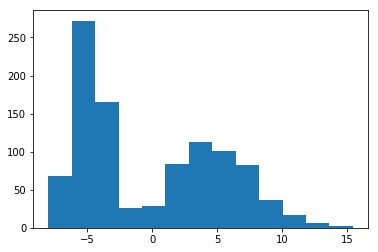

In [4]:
# Sampling Method 1  (expensive)
u=tf.random_uniform([N],minval=0.,maxval=1.)
samples1=dist1.sample([N])
samples2=dist2.sample([N])

def f(samples,i):
    return samples[i]

samples=[]
for i in range(N):
    samples.append(tf.cond(tf.less(u[i],p), lambda: f(samples1,i), lambda: f(samples2,i)))
plt.hist(sess.run(samples), bins='auto')
plt.show()

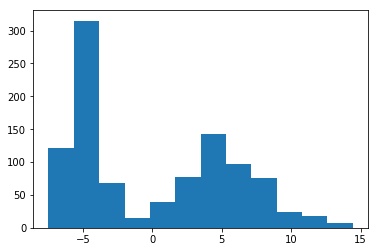

In [5]:
# Sampling method 2 (inexpensive)
N=1000
u=tf.random_uniform([N],minval=0.,maxval=1.)
samples1=dist1.sample([N])
samples2=dist2.sample([N])

d=tf.less(u,p) # logic expression
mask1=tf.cast(d, tf.float32) # mask for the true statement
mask2=tf.cast(tf.logical_not(d), tf.float32)  # mask for the false statement 
samples1=samples1*mask1
samples2=samples2*mask2
samples=samples1+samples2


plt.hist(sess.run(samples), bins='auto')
plt.show()

In [6]:
num=tf.count_nonzero(mask1)
print(sess.run(num/N))

0.508


In [36]:
shape=[2,2]
u=tf.random_uniform(shape,minval=0.,maxval=1., dtype= tf.float32)
print(sess.run(u))

[[ 0.42157185  0.00151932]
 [ 0.82643545  0.12162745]]


In [46]:
rho=tf.constant(-0.05)
s=tf.nn.softplus(rho)
print(sess.run(s))

0.66846
